# Decoder

This is a continuation of the `helloworld` notebook, now focused on decoding the bits of the `digital_stream`. This notebook is based on a larger capture of the same signal as in the `helloworld` notebook. You may recognize the first part of the signal, but then the signal repeats itself. The transmitter seems to send the same signal four times per button press, and continuously when pressing and holding the button.

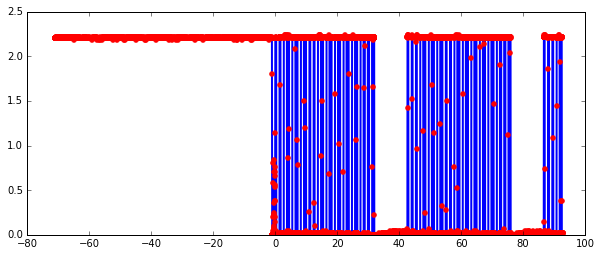

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

csv = np.genfromtxt('data/helloworld_full_capture.csv', delimiter=',', skip_header=2, usecols=(0, 1))
csv = np.transpose(csv)
time = csv[0] * 1000
voltage = csv[1]

def oscilloscope(x, y, width=10, height=4, start=0, stop=None):
    fig = plt.figure(figsize=(width, height))
    axes = fig.add_subplot(111)
    axes.plot(x[start:stop], y[start:stop], marker='o', mec='red', mfc='red', markersize=5, linewidth=2)
    plt.show()

oscilloscope(time, voltage)

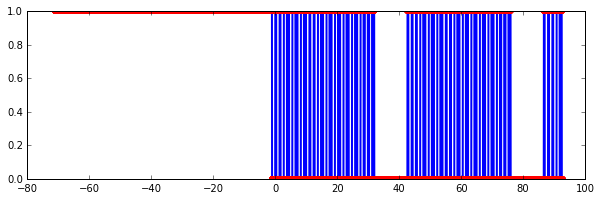

In [5]:
digital_one = np.percentile(voltage, 90)
digital_stream = voltage / digital_one
digital_stream = digital_stream.round()
oscilloscope(time, digital_stream, height=3)

Let's focus on the part between `time` 40 and 80, this should represent a complete RF remote message:

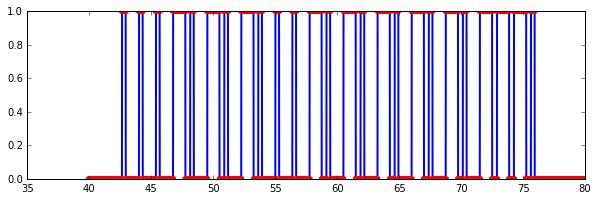

In [6]:
start = 40
stop = 80
def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
start_index = time.tolist().index(find_nearest(time, start))
stop_index = time.tolist().index(find_nearest(time, stop))

oscilloscope(time, digital_stream, height=3, start=start_index, stop=stop_index)